# RO47002 Machine Learning for Robotics
* (c) TU Delft, 2023
* Period: 2023-2024, Q1
* Course homepage: https://brightspace.tudelft.nl/d2l/home/597271

Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. Moreover, if you see an empty cell, please DO NOT delete it, instead run that cell as you would run all other cells. Please fill in your name(s) and other required details below:

In [ ]:
GROUP_NUMBER = ""
STUDENT_NAME1 = ""
STUDENT_NUMBER1 = ""
STUDENT_NAME2 = ""
STUDENT_NUMBER2 = ""

In [ ]:
# Note: this block is a check that you have filled in the above information.
# It will throw an AssertionError until all fields are filled
assert(GROUP_NUMBER != "")
assert(STUDENT_NAME1 != "")
assert(STUDENT_NUMBER1 != "")
assert(STUDENT_NAME2 != "")
assert(STUDENT_NUMBER2 != "")

### General announcements

* Do *not* share your solutions, and do *not* copy solutions from others. By submitting your solutions, you claim that you and your lab partner alone are responsible for this code.

* Do *not* email questions directly, since we want to provide everybody with the same information and avoid repeating the same answers. Instead, please post your questions regarding this assignment in the correct support forum on Brightspace, this way everybody can benefit from the response. If you do have a particular question that you want to ask directly, please use the scheduled practicum hours to ask a TA.

* There is a strict deadline for each assignment. Students are responsible to ensure that they have uploaded their work in time. So, please double check that your upload succeeded to the Brightspace and avoid any late penalties.

* This [Jupyter notebook](https://jupyter.org/) uses `nbgrader` to help us with automated tests. `nbgrader` will make various cells in this notebook "uneditable" or "unremovable" and gives them a special id in the cell metadata. This way, when we run our checks, the system will check the existence of the cell ids and verify the number of points and which checks must be run. While there are ways that you can edit the metadata and work around the restrictions to delete or modify these special cells, you should not do that since then our nbgrader backend will not be able to parse your notebook and give you points for the assignment. You are free to add additional cells, but if you find a cell that you cannot modify or remove, please know that this is on purpose.

* This notebook will have in various places a line that throws a `NotImplementedError` exception. These are locations where the assignment requires you to adapt the code! These lines are just there as a reminder for youthat you have not yet adapted that particular piece of code, especially when you execute all the cells. Once your solution code replaced these lines, it should accordingly *not* throw any exceptions anymore.

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

---

# Practicum 6

* Topic: Neural networks, back propagation
* Before performing this practicum, work through **Book chapter(s): 10, 11**
* **Deadline**: Tuesday, 17 October, 2023 12:00

## Objectives

* Single layer perceptron
* Neural network design
* Forward-backward propagation
* Keras library
* Forward kinematics with NN

<div class="alert alert-info">
    <h1>🎥 <a href="https://brightspace.tudelft.nl/d2l/le/content/597271/viewContent/3314488/View">Lecture 6A - Neural Network - Introduction</a></h1>
    It is recommended to to watch this video if you haven't watched it yet. This would motivate you to appreciate the application of Neural Networks.
</div>

# I : Classification with a Neural Network

In this section, you will implement your first neural network, in this case a single layer perceptron. The general methodology to build a neural network is to (a) Define the neural network structure e.g., number of input units, number of hidden units/layers, and number of output units (some times known as logits). (b) Initialize model's parameter, (c) Loop over forward propagation, cost computation, backward propagations for gradients estimation and update network parameters. In the following sections, we will go through all these stages step by step.

![Single Layer Perceptron](extra/network.png)

### Import required packages

Here we import some of the required packages for this notebook.
Please note that we need to install keras>=2.9.0 in the homl3 environment for this notebook.

In [ ]:
!pip install keras==2.10.0

In [ ]:
# Package imports 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

import sklearn
import sklearn.datasets
import sklearn.linear_model
from utils import *

# set a seed for consistent results
np.random.seed(766)

## 1: Classifying Flower Petals
### 1.1 : Load Dataset
Here we will load a "flower" 2-class dataset into variables X and Y. Call the function ```create_flower_dataset()``` in the cell below and store the return output into **X** and **Y** variables.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(X is not None and Y is not None)
assert(isinstance(X, (np.ndarray, np.generic)) and isinstance(Y, (np.ndarray, np.generic)))
assert(X.shape==((2, 400)))
assert(Y.shape==((1, 400)))

Let's first see the shape inputs (X) and output (Y). We can also visualize the dataset to see distinct classes.

In [ ]:
print(f'Your input matrix shape is: {X.shape} i.e., with two features x1 and x2, while shape of output vector is: {Y.shape}.')
print(f'The number of samples in the dataset is: {X.shape[1]}')
# Visualize the data: 
plt.scatter(X[0, :], X[1, :], c = Y[0, :], s = 80, edgecolors='black', cmap = plt.cm.Spectral); 

If your data is loaded correctly, then you should see a plot like this:
![flower dataset plot](extra/flower_dataset.png)

<div class="alert alert-info">
    <h1>🎥 <a href="https://brightspace.tudelft.nl/d2l/le/content/597271/viewContent/3314492/View">Lecture 6B - Neural Network - Non-Linearities</a></h1>
    The following requires the knowledge covered in this lecture. If you haven't watched the video yet, it's now high time to do so...
</div>

### 1.2 : Neural Network Model Design
The data is clearly not linearly separable. This can be confirmed if you try to fit this data on a linear logistic regression model you learned in the previous practica. So we are now going to create a single layer neural network as already shown in the figure above to see if we can fit the non-linear decision boundary from this dataset.

We define our neural network with three variables: <br>
    **NX:** Size of input layer <br>
    **NH:** Number of units in the hidden layer (for now simply return the variable as it is) <br>
    **NY:** Number of logits.

In [ ]:
def layer_sizes(X, Y, NH):
    # YOUR CODE HERE
    raise NotImplementedError()
    return NX, NH, NY

In [ ]:
X_dummy, temp, Y_dummy = dummy_dataset_1()
NX, NH, NY = layer_sizes(X_dummy, Y_dummy, temp)
assert(NX==3)
assert(NH==8)
assert(NY==2)

NX, NH, NY = layer_sizes(X, Y, 5)

Now we write a function to initialize weights and bias vectors with random values. Your function will take model parameters defined above as arguments, while it will return a dictionary of parameters containing the following: <br>
    **WM1**: weight matrix of shape (NH, NX) <br>
    **BV1**: bias vector of shape (NH, 1)<br>
    **WM2**: weight matrix of shape (NY, NH)<br>
    **BV2**: bias vector of shape (NY, 1)<br>
    
You can use ```np.random.rand(a,b) * 0.01``` to randomly initialze a matrix of shape (a,b). Bias vectors will be initialized with zeros. <br>

Hint: ```np.zeros((a,b))```

In [ ]:
def initialize_parameters(NX, NH, NY):
    
    np.random.seed(2)
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    params = {    "WM1": WM1,
                  "BV1": BV1,
                  "WM2": WM2,
                  "BV2": BV2}
    
    return params

In [ ]:
X_dummy, temp, Y_dummy = dummy_dataset_2()
NX, NH, NY = layer_sizes(X_dummy, Y_dummy, temp)
parameters = initialize_parameters(NX, NH, NY)

assert (parameters["WM1"].shape == (NH, NX))
assert (parameters["BV1"].shape == (NH, 1))

### 1.3 : Forward Propagation

Now we will implement a forward pass for this network. The equations for the forward pass are given below:
$$ $$
<font size="5">
$$ z^{[l]} = w^{[l]} \cdot a^{[l-1]}+b^{[l]} $$

$$ a^{[l]} = g^{[l]}(z^{[l]}) $$</font>

### Activation Functions
Let us first have a look at activation functions (referred to as $g^{[l]}$ in the above equation. Two activation functions namely "tanh" and "sigmoid" will be used in this example. Sigmoid is given as follows:
<font size="5">$$\frac{1}{1 + e^{-z}}$$</font>

While tanh can be computed with the following equation:
<font size="5">$$ \frac{2}{1 + e^{-2z}} - 1 $$</font>


Implement sigmoid function in the following cell, while for tanh you can use ```np.tanh()```.

In [ ]:
def sigmoid(x):
    # YOUR CODE HERE
    raise NotImplementedError()
    return sig

In [ ]:
np.random.seed(434)
assert(abs((np.mean(sigmoid(0.5)) - 0.6224593312018546)) < 1e-4) 

Now you need to compute $Z^{[1]}$, $A^{[1]}$, $Z^{[2]}$, $A^{[2]}$ for your neural network exploiting the equations presented above. Store the values in variables e.g., **Z1** for $Z^{[1]}$, **A1** for $A^{[1]}$ and so on. These values are being returned in a dictionary called cache.
Note: Use 'tanh' activation in the first layer and 'sigmoid' activation in the second layer.

In [ ]:
def forward_prop(X, parameters): 
  
    # Retrieve each parameter from the dictionary "params"
    W1 = parameters["WM1"]
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Implement the equations to compute the required activation values.
    #Z1 = your code here
    #A1 = your code here
    #Z2 = your code here
    #A2 = your code here
    # YOUR CODE HERE
    raise NotImplementedError()
      
    # This cache will be used for backpropagation 
    cache = {"Z1": Z1, 
             "A1": A1, 
             "Z2": Z2, 
             "A2": A2}
      
    return A2, cache 

In [ ]:
X_assess, params = forward_propagation_test()
A2_assess, cache_assess = forward_prop(X_assess, params)

assert(abs((np.squeeze(A2_assess)[0] - 0.5002307023021203)) < 1e-4)
assert(abs((np.squeeze(A2_assess)[1] - 0.4998583053049564)) < 1e-4)
assert(abs((np.squeeze(A2_assess)[2] - 0.5002396329502165)) < 1e-4)

<div class="alert alert-info">
    <h1>🎥 <a href="https://brightspace.tudelft.nl/d2l/le/content/597271/viewContent/3314494/View">Lecture 6C - Neural Network - Training</a></h1>
    The following requires the knowledge covered in this lecture. If you haven't watched the video yet, it's now high time to do so...
</div>

### 1.4 : Cost Function
Now you have a vector A2 (or $\hat{y}$) for predictions on all the examples in the dataset. We can now compute the cost function comparing the predictions with the ground truth labels. Here we will use cross-entropy cost function, which can be written as follows:
$$ $$
<font size="5">
$$ C = - \frac{1}{m} \sum_{i=0}^{m} (y\log\hat{y} + (1-y)\log(1-\hat{y}))$$ </font>

m is the total number of samples 

In [ ]:
def compute_cost(A2, Y): 
    m = Y.shape[1] 
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Squeezing to avoid unnecessary dimensions 
    cost = np.squeeze(cost) 
    return cost

In [ ]:
np.random.seed(533)
Y_assess = np.random.rand(A2_assess.shape[0], A2_assess.shape[1])

cost_assess = compute_cost(A2_assess, Y_assess)
assert(abs((cost_assess - 0.6930698639230951)) < 1e-4 )
print(cost_assess)

### 1.5 : Backpropagation
Now its time to implement back propagation algorithm. You will have to estimate derivatives of your activation functions and partial derivatives of the cost function. Remeber that:

$$ $$
<font size="5">
$$ z^{[l]} = w^{[l]} \cdot a^{[l-1]}+b^{[l]} $$

$$ a^{[l]} = \sigma^{[l]}(z^{[l]}) $$</font>


We provide you with the equations of the required derivatives in the following:
<font size="3"><ins>
    
Derivative of sigmoid function (useful in the last layer)</ins></font>
$$ $$
<font size="5">
$$ \sigma^\prime(z^{[l]}) = \sigma(z^{[l]}) \cdot(1- \sigma(z^{[l]})) $$</font>
$$ $$
<font size="3"><ins>Derivative of tanh function (useful in the middel layer)</ins></font>
<font size="5">
$$ \sigma^\prime(z^{[l]}) = 1 - \sigma(z^{[l]})^2$$</font>
$$ $$
<font size="3"><ins>Partial derivate of cross-entropy cost function with respect to $z^{[L]}$ (Try yourself to do all the steps to arrive to this final equations! Make good use of the chain rule. )</ins></font>
$$ $$
<font size="5">
$$ \frac{\partial C}{\partial z^{[L]}} = a^{[L]} - y $$</font>
$$ $$
<font size="3"><ins>Partial derivative of the cost function with respect to $z^{[l]}$</ins></font>
$$ $$
<font size="5">
$$ \frac{\partial C}{\partial z^{[l]}} =  \frac{\partial C}{\partial z^{[l+1]}} \frac{\partial z^{[l+1]}}{\partial z^{[l]}} =(w^{[l + 1]^T} \cdot \frac{\partial C}{\partial z^{[l+1]}}) \circ \sigma^\prime(z^{[l]})  $$</font>

Here <font size="5">$\cdot$</font> represents matrix multiplication, while <font size="5">$\circ$</font> represents Hadamard Product.

<font size="3"><ins>Partial derivative of the cost function with respect to $w^{[l]}$</ins></font>
$$ $$
<font size="5">
$$ \frac{\partial C}{\partial w^{[l]}}=\frac{\partial C}{\partial z^{[l]}} \frac{\partial z^{[l]}}{\partial w^{[l]}}=\frac{\partial C}{\partial z^{[l]}} \cdot \sigma^{[l-1]}(z^{[l-1]})^T = \\ \frac{\partial C}{\partial z^{[l]}} \cdot a ^ {[l-1]^T}$$</font>
$$ $$
<font size="3"><ins>Partial derivative of the cost function with respect to $b^{[l]}$</ins></font>
$$ $$
<font size="5">
$$ \frac{\partial C}{\partial b^{[l]}} = \frac{\partial C}{\partial z^{[l]}} \frac{\partial z^{[l]}}{\partial b^{[l]}}= \frac{\partial C}{\partial z^{[l]}}$$</font>

NOTE that the derivatives <font size="4">$\frac{\partial C}{\partial w^{[l]}}$</font> and <font size="4">$\frac{\partial C}{\partial b^{[l]}}$</font> consider input X as only one training example, for a batch of m examples, we will have to average the derivatives over the m.

### Update rules:

Once you compute the gradients, your will have to update the parameters for the next iteration. The update is performed through gradient descent rule which says:
<font size="5">
$$\theta = \theta - \alpha\frac{\partial C}{\partial \theta}$$</font>

where $\alpha$ is the learning rate, while $\theta$ represents a parameter. E.g, for updating weights and bias values you might use the following:
$$ $$
<font size="5">
$$w^{[l]} = w^{[l]} - \alpha\frac{\partial C}{\partial w^{[l]}}$$

$$b^{[l]} = b^{[l]} - \alpha\frac{\partial C}{\partial b^{[l]}}$$</font>

It is important to select an appropriate learning-rate for training of your network. With too large learning rates, the parameters will start bouncing around chaotically and the optimization will not settle in a good spot. However, too small learning rates the optimization might take very long to converge.
![Learning Rates](extra/learningrates.jpeg)
Image source: https://cs231n.github.io/neural-networks-3/

Implement the derivatives and update rule in the following cell:

In [ ]:
def back_propagate(parameters, cache, X, Y, learning_rate): 
   
    # Retrieve also A1 and A2 from dictionary "cache" 
    A1 = cache['A1'] #first layer result 
    A2 = cache['A2'] #second layer result
   
    WM1 = parameters["WM1"].copy()
    WM2 = parameters["WM2"].copy()
    BV1 = parameters["BV1"].copy()
    BV2 = parameters["BV2"].copy()
    
    m = X.shape[1]
  
    # Backward propagation: calculate dCdZ1, dCdW1, dCdb1, dCdZ2, dCdW2, dCdb2.
    
    dCdZ2 = A2 - Y 
    dCdW2 = (1 / m) * np.dot(dCdZ2, A1.T) 
    dCdb2 = (1 / m) * np.sum(dCdZ2, axis = 1, keepdims = True) 
    
    # YOUR CODE HERE
    raise NotImplementedError()
      
    # Updating the parameters WM1, WM2, BV1, BV2, according to algorithm 
    # YOUR CODE HERE
    raise NotImplementedError()
    
    grads = {"dW1": dCdW1,
             "db1": dCdb1,
             "dW2": dCdW2,
             "db2": dCdb2}
    
    parameters = {"WM1": WM1,
                  "BV1": BV1,
                  "WM2": WM2,
                  "BV2": BV2}
   
    return grads, parameters

In [ ]:
params, cache, X_assess, Y_assess = bp_values()

grads_assess, params_new = back_propagate(params, cache_assess, X_assess, Y_assess, 0.01)

grads_gt = gt_grads()

for k in grads_assess:
     assert(np.allclose(grads_assess[k], grads_gt[k], rtol=1e-05, atol=1e-08, equal_nan=False))



### 1.6 : Creating a Model
Now we will integrate the helper functions we just created to build your neural network in ```model_perceptron()```.

In [ ]:
def model_perceptron(X, Y, NH, num_iterations, learning_rate, print_cost):
    # Here num_iteration is epochs 

    np.random.seed(643)
    NX = X.shape[0]
    NY = Y.shape[0]
    
    # Initialize parameters
    parameters = initialize_parameters(NX, NH, NY)
    
    for i in range(0, num_iterations):
    
        # Forward propagation. Inputs: "X, parameters". return: "A2, cache".
        A2, cache = forward_prop(X, parameters) 

        # Cost function. Inputs: "A2, Y". Outputs: "cost". 
        cost = compute_cost(A2, Y) 
        
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads" and "parameters (updated)".
        grads, parameters = back_propagate(parameters, cache, X, Y, learning_rate) 
        
        # Print the cost every 1000 iterations 
        if print_cost and i % 1000 == 0: 
            print ("Cost after iteration % i: % f" % (i, cost)) 
    return parameters

In [ ]:
NH = 5
parameters = model_perceptron(X, Y, NH, 100000, 0.005, True)

### 1.7 : Predictions
Now since our model has been trained, we will create a ```predict``` function to get the predictions on the test set. In this function we will pass the learned parameters along with a matrix of input samples and a threshold variable. This function will pass the input samples through the forward pass of the network and will return the predictions. The threshold variable is used to convert the output probabilities into class values as 0/1.

In [ ]:
def predict(parameters, X, thresh):
   
    # Computes probabilities using forward propagation, and classifies to 0/1 using thresh as the threshold.
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return predictions

In [ ]:
np.random.seed(34)
X_dummy = np.random.rand(X.shape[0], X.shape[1])
predicts = predict(parameters, X_dummy, 0.5)
assert((abs(np.sum(predicts) - 196) <= 10))

Now we predict the output of the network and plot it using ```plot_decision_boundary``` function.

In [ ]:
plot_decision_boundary(lambda x: predict(parameters, x.T, 0.5), X, Y)
# plt.title("Decision Boundary for hidden layer size " + str(4));

If everything works well, then you should be able to see the decision boundary learned by the network which is highly non-linear. The network has learnt the leaf patterns of the flower.
![predicted decision boundary](./extra/predict_dec_boundary.png)


## 2: Classifying a Pen
### 2.1 : Create a Neural Network in Keras
In this section, we will continue the problem of a pen detector presented in practicum2 and will train an image classifier through a neural network. We will use Keras from Tensorflow2 to write the code of our algorithm. We will start by loading the images files in ```images/mypen``` folder.

In [ ]:
IMAGE_DIR = 'images/mypen'

filenames = list_images(IMAGE_DIR)
N = len(filenames)

# list all images. There should be 37 images in the images/mypen/ directory
Is = [plt.imread(filename) for filename in filenames]
print('loaded %d images' % len(Is))

Now we load the annotation files using pickle.

In [ ]:
import pickle

annots = None # store your results in the variable `annots`
annot_filename = os.path.join(IMAGE_DIR, 'annots.npy')

annots = pickle.load(open(annot_filename, 'rb'))

We load the first image using index ```img_idx = 0``` as a sample to see the annotated points.

In [ ]:
img_idx = 0
I = Is[img_idx]
p1 = annots[img_idx,:2].copy() # point 1, tip of the pen
p2 = annots[img_idx,2:].copy() # point 2, end of the pen

Now we sample the images patches around the annotated points. 

In [ ]:
points = sample_points_around_pen(I, p1, p2)

In [ ]:
labels = make_labels_for_points(I, p1, p2, points)
plt.figure(figsize=(10,12))
plt.imshow(I)
plot_labeled_points(points, labels)
plt.legend()

In [ ]:
# the target size of the patches after downsizing
FEAT_SIZE = (9,9,3)

Let's divide the images into train and test sets by creating an index. This time randomly select 25 images for as train_imgs and rest of the images as test. Hint: You can use ```random.shuffle()``` to shuffle a python list.
Note: The train_imgs should be a list of indices, rather than a list of training images.

In [ ]:
import random
random.seed(23)
indices = list(range(0, len(Is)))

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(np.sum(indices[:10] != 45))
#print(np.shape(test_imgs)[0])

In [ ]:
X_train, y_train, points_train, imgids_train = extract_multiple_images(Is, train_imgs, annots, FEAT_SIZE)

In [ ]:
X_test, y_test, points_test, imgids_test = extract_multiple_images(Is, test_imgs, annots, FEAT_SIZE)

In [ ]:
plot_samples(X_train, y_train, FEAT_SIZE, nsamples = 12)

### 2.2: Our Neural Network
Let us now create our Neural Network for image classification problem using keras. Let us first import required packages.

In [ ]:
import tensorflow as tf
from tensorflow import keras

We then define some variables here. We are going to create a neural network with two hidden layers this time. We need to know the input size of our neural network. This should come from the flattened image patches (number of features in each patch) that we are already have in X_train (or X_test) sets. Extract this value and save it in ```num_input_units``` variable. Similarly, we need to define the number of output neurons or ```num_logits```. This corresponds to the number of classes we have in our dataset. We also define ```NNH_1``` and ```NNH_2``` variables. These corresponds to number of units in hidden layer 1 and hidden layer 2. For now just return the variables as you receive them in the arguments.

In [ ]:
def config_layers(X_train, NNH_1, NNH_2, y_train):
    # YOUR CODE HERE
    raise NotImplementedError()
    return num_input_units, NNH_1, NNH_2, num_logits

In [ ]:
X_dummy, y_dummy = get_dummy_images()
num_input_units_temp, NNH_1_temp, NNH_2_temp, num_logits_temp = config_layers(X_dummy, 45, 343, y_dummy)
assert(num_input_units_temp == 343)
assert(num_logits_temp == 7)


We are going to use Sequential API of Keras here. Let us import the required layers.

In [ ]:
from keras.layers import Dense

### 2.3:  Design
Now we design our actual neural network here. We have provided the code for the first (hidden layer) and the last layers of the network. You have to write the code specifically for the second hidden layer in the following. Note: Use 'relu' as activation function.

In [ ]:
# We first get the layers config values.
num_input_units, NNH_1, NNH_2, num_logits = config_layers(X_train, 173, 67, y_train)

image_model = keras.models.Sequential()
image_model.add(Dense(NNH_1, input_dim=num_input_units, activation='relu'))
# YOUR CODE HERE
raise NotImplementedError()
image_model.add(Dense(num_logits, activation='softmax'))

# model.add(Dropout(rate = 0.2))

In [ ]:
layer = image_model.layers[1]
assert(isinstance(layer, keras.layers.Dense))
assert(layer.output.shape[1] == NNH_2)



We can also print the summary of the model we just created using command ```model.summary()```. Through this we will be able to have insight into our model we just created. We can see a list a layers, their names, types, output shapes and number of parameters in each layer. We can also see total parameters of our network as well as trainable and non-trainable parameters. This might be important when we fine-tune pretrained models or when we are trying to reduce number of parameters in our model.

In [ ]:
print(image_model.summary())

Moreover, keras provides us a tool ```plot_model``` that we can use to plot our model and then save the plot as an image.

In [ ]:
keras.utils.plot_model(image_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### 2.4: Configuration
Once we are satisfied with our model design, we can move on to config it. At this stage we will need to chose the type of loss we want to use, the optimizer and metrics that we want keras to pay attention to. Keras provides several loss functions and optimizers, while we can write our own loss functions and can use other optimizers as well. Here we chose to use ```binary_crossentropy``` loss, ```adam``` optimizer and ```accuracy``` as metrics.

Compile the model by using ```model.compile``` command. For hint, please see [this](https://keras.io/api/models/model_training_apis/).

In [ ]:
# compile the keras model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(image_model.loss == 'binary_crossentropy')

Before we move on to train the model, we need to perform one-hot encoding of our y vector. Hot-vector encoding replaces the integer labels in our ground truth vector with new binary style labeling. After one-hot encoding, each category in the dataset is represented by a column in the output label vector.

For example see below:

    original y vector     one_hot y_matrix
    1                       0010
    0                       0001
    2                       0100
    1                       0010
    3                       1000
    3                       1000
    1                       0010
    2                       0100
    2                       0100
    
Write a code in the following cell to convert your y vectors (y_train and y_test) into one-hot encoded vectors.
Note: You can use the keras function for this.

In [ ]:
def one_hot_encoding(y_orig):
    # YOUR CODE HERE
    raise NotImplementedError()
    
    y_one_hot = y_one_hot.astype(np.uint8)
    
    return y_one_hot

In [ ]:
y_dummy_one_hot = one_hot_encoding(y_dummy)

assert(y_dummy_one_hot.shape == ((len(y_dummy), num_logits_temp)))
for i in range(0, len(y_dummy)):
    assert(np.sum(y_dummy_one_hot[i,:]) == 1)


<div class="alert alert-info">
    <h1>🎥 <a href="https://brightspace.tudelft.nl/d2l/le/content/597271/viewContent/3314496/View">Lecture 6D - Neural Networks - Problems</a></h1>
    The following requires the knowledge covered in this lecture. If you haven't watched the video yet, it's now high time to do so...
</div>

One last thing before we go on to train our network. While training, it might happen that the performance of the network fluctuates due to some reason. But we would like to save the network that performs the best from all the iterations. So we create a callback, and pass it to the training function of keras, that would only save the best performing model on our disk and would discard rest of the models. We create a checkpoint call back as below:

In [ ]:
checkpoint_path = "learned_weights/weights.best.hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)

import os

if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 monitor='val_accuracy',
                                                 mode='auto',
                                                 save_best_only=True,
                                                 save_weights_only=False,
                                                 save_freq='epoch',
                                                 verbose=1)

Now, we can finally train our network. For this we will use function ```model.fit()```. For details please see [this](https://keras.io/api/models/model_training_apis/). We will define some parameter values and will pass those values to the training function. Please note, that we further divide our training set into train and validation sets. Keras will train on the train set, while it assess the performance of the network 

In [ ]:
validation_split = 0.33
epochs = 30
batch_size = 10
y_train_one_hot = one_hot_encoding(y_train)

history = image_model.fit(X_train, y_train_one_hot, validation_split=validation_split,\
                    epochs=epochs, batch_size=batch_size, callbacks = [cp_callback])

Let's plot the training logs which we saved in history variable.

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

To evaluate the trained model on test set which is still unseen by the network we can use ```model.evaluate()``` function.

In [ ]:
y_test_one_hot = one_hot_encoding(y_test)
_, accuracy = image_model.evaluate(X_test, y_test_one_hot)
print('Accuracy: %.2f' % (accuracy*100))

**How would you assess the model plots of training/validation accuracy and loss? Why is the gap between train and validation curves? How would you solve this problem? Hint: Rename one `answer` to `solution`**

In [ ]:
reason=''
solution=''
#reason='The network is overfitting'
#reason='The network is underfitting'
#answer='We should increase the learning rate'
#answer='We should decrease the learning rate'
#answer='We should make the network bigger'
#answer='We should make the network smaller'
#answer='We should stop the training before'
#answer='We should apply Dropout'
#answer='We should apply L1 Regularization'
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(reason!='')
assert(solution!='')

Finally, we can predict the output of a given sample (or an input matrix) by using ```model.predict()``` function. Complete the function below to get prediction values when given the model and an input matrix X to the ```our_predict``` function. The raw outputs from the model will be in the form of probabilities. One way of getting outputs in original labels is to find, for each row of predictions, which column has the maximum probability. Implement this in the function below.

In [ ]:
def our_predict(model, X):
    # YOUR CODE HERE
    raise NotImplementedError()
    return y_predict, y_predict_raw

In [ ]:
y_predict_train, _ = our_predict(image_model, X_train)
assert((np.count_nonzero(y_predict_train == y_train)/len(y_train)) > 0.88)

We will now use ```plot_image_classification_results``` function, to see the output of our neural network on our test set of pen images.

In [ ]:
def plot_image_classification_results(img_idx, y_pred_raw, points, imgids, Is):
    mask = imgids == img_idx
    points = points[mask,:]
    predictions = y_pred_raw[mask,:]
    y_pred = np.argmax(predictions, axis = 1)
    best_idx1 = predictions[:,1].argmax()
    best_idx2 = predictions[:,2].argmax()
    
    # load image
    I = Is[img_idx]

    plt.figure()
    plt.imshow(I)
    plt.plot(points[y_pred==0, 0], points[y_pred==0, 1], '.r')
    plt.plot(points[y_pred==3, 0], points[y_pred==3, 1], '.y')
    plt.plot(points[y_pred==1, 0], points[y_pred==1, 1], '.g')
    plt.plot(points[y_pred==2, 0], points[y_pred==2, 1], '.b')
    plt.plot(points[(best_idx1, best_idx2), 0], points[(best_idx1, best_idx2), 1], 'c-', linewidth=2)
    plt.plot(points[best_idx1, 0], points[best_idx1, 1], 'co')
    plt.show()

In [ ]:
test_img_idxs = np.unique(imgids_test)
y_predict, y_predict_raw = our_predict(image_model, X_test)

def plot_nth_train_result(n):
    plot_image_classification_results(test_img_idxs[n], y_predict_raw, points_test, imgids_test, Is)
    
ipywidgets.interact(plot_nth_train_result, n=(0,len(test_img_idxs)-1))

### 2.5 : Train a neural network on your pen images
Now its your turn to train a neural network on your own pen images from practicum2. You need to do the following here:

1. Combine your pen images with the images of your partner in a single folder.
2. Train any classifier from practicum2 on the combined images.
3. Develop your neural network as described in this practicum.
4. Train your neural network on your combined pen images.
5. Compare the results obtained from your neural network with those obtained in step 2.

Note: Perform the tasks in multiple cells (do not write all your code in 1 cell). Also explain the code with readable comments. Create as many new cells as you want here. If you have to copy a piece of code from the cells above, only copy the code and DO NOT copy the cells with notebook copy buttons.

In [ ]:
partner1_filenames = list_images('images/lab_partner1')
partner2_filenames = list_images('images/lab_partner2')

Explain your results here!


# II : Regression with a Neural Network

## 3. Learning Inverse Kinematic Using Artificial Neural Networks

In Practicum 4 we learned how to learn to perform a collision avoidance trajectory using a database of expert policies.

In case we are dealing with the control of a robotic arm, we can only directly control the joint angles and indirectly the end effector. Usually for the generation of the forward kinematics that relates the joint position with the end effector position,  different mathematical description of the robot are used in the literature, e.g. [Denavit-Hartenberg parameters](https://en.wikipedia.org/wiki/Denavit–Hartenberg_parameters). 
The main problem is when we have to deal with the inverse kinematics because it happens that the function that describe the forward kinematics is not invertible and/or doesn't have any analytic solution. Different solutions have been proposed in the literature using for example [numerical methods](https://en.m.wikipedia.org/wiki/Inverse_kinematics). 

In the following part of the assignment we want to learn the Inverse Kinematics of a simple 2 dof planar [SCARA robot](https://www.bing.com/images/search?view=detailV2&ccid=Jaadt6Qp&id=7F1893B3C2B4420570E40BC605E4FAC41B56DF4F&thid=OIP.Jaadt6QpN5EGbi2h6R1mXgHaFn&mediaurl=http%3a%2f%2fwww.engineering.com%2fportals%2f0%2fBlogFiles%2fSCARA-Robot+(1).jpg&exph=485&expw=640&q=scara+robot&simid=608011251659509423&ck=3B70ED2767BB135E6D7A2477F18557A7&selectedIndex=0&FORM=IRPRST&ajaxhist=0) with a Neural Network where we will generate a database with random joint angles **(q1,q2)** and relative **(x,y)** end-effector positions with a Forward Kinematics function. In the training we will consider the end-effector coordinates as **inputs** and the joint angle as label for the **output**.

The final goal will be the execution of a trajectory in end-effector coordinates (drawing a square) but controlling the joints using the trained Neural Network Inverse Kinematics. 

More details about Robot Dynamics and Control will be introduced in the homonym course in the next quartile. 

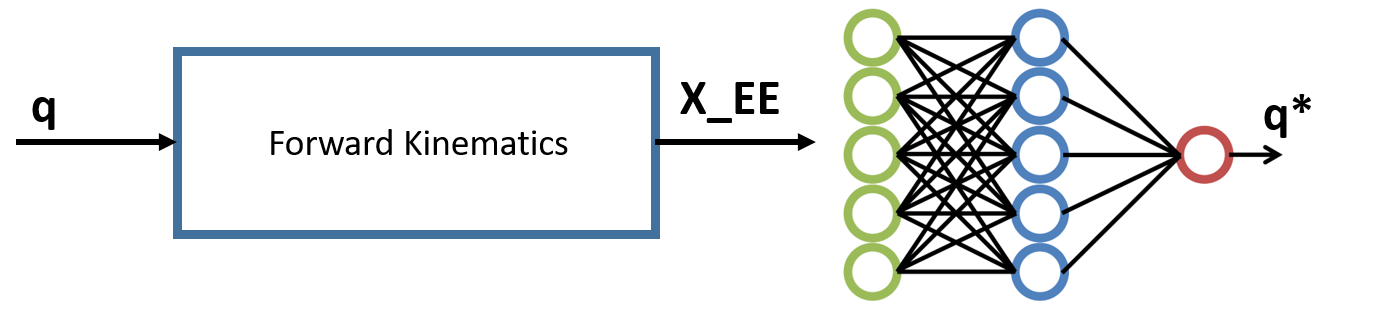

### 3.1 Neural Network Design
Define a Neural Network with 
1. two inputs
2. 4 hidden Dense layers with 32 neurons each
3. two outputs
4. Use the activation function relu for the hidden layers and no activation for the last layer 

[Help you out here](https://www.tensorflow.org/api_docs/python/tf/keras/layers) 

In [ ]:
seed = 7
np.random.seed(seed)

X_train = []
X_test = []
y_train= []
y_test = []
##define base model
model = tf.keras.models.Sequential([
  
  tf.keras.layers.Flatten(input_shape=([2])),  
  # YOUR CODE HERE
  raise NotImplementedError()
    
])

In [ ]:
layer= model.layers[0]
assert(isinstance(model.layers[0], keras.layers.Flatten))
assert(isinstance(model.layers[1], keras.layers.Dense))
assert(isinstance(model.layers[2], keras.layers.Dense))
assert(model.layers[4].get_config()['activation']=='relu')

### 3.2 : Configuration
Now compile the Keras model
* Choose the [mean squared error](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError)  as cost function
* Choose ADAM as optimizer
* Select a learning rate equal to 0.001


In [ ]:
#loss_fn = 
#learning_rate =
#optimizer =
#model.compile()
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(loss_fn.name=='mean_squared_error')

### 3.3 : Generate training data
We have to generate random samples from the forward kinematics. 
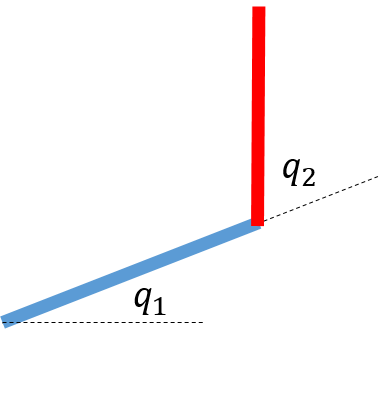

In [ ]:
# Function for the generation of the database with random samples of the joint angles and the relative forward kinematics

def data_gen(q1_min, q1_max, q2_min, q2_max):
    data_scara = []
    for i in range(20000):
        deg2rad = np.pi/180.0
        Q1 = random.uniform(q1_min*deg2rad, q1_max*deg2rad)
        Q2 = random.uniform(q2_min*deg2rad, q2_max*deg2rad)
        x=0.5*np.cos(Q1)+0.5*np.cos(Q1+Q2) #Forward kinematic x position
        y=0.5*np.sin(Q1)+0.5*np.sin(Q1+Q2) #Forward kinematic y position
        data_scara.append([x, y, Q1, Q2])
    return np.array(data_scara)

Let's define the physical joint limits of our robot. Let's choose -180 deg and 180 deg for both the joints. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(q1_min==-180)
assert(q2_max==180)

In [ ]:
# Generate the dataset
dataset = data_gen(q1_min, q1_max, q2_min, q2_max) #Generation of the dataset


Divide the dataset with a ratio 8:2

In [ ]:
#X_train = dataset[,:2]
#Y_train = dataset[,2:]
#X_test = dataset[,:2]
#Y_test = dataset[,2:]

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(X_train.shape[0] is not None)
assert(Y_train.shape[0] is not None)
assert(X_test.shape[0] is not None)
assert(Y_test.shape[0] is not None)


### 3.4 : Fit the model

In [ ]:
model.fit(X_train, Y_train, epochs=20)
model.evaluate(X_test,  Y_test, verbose=2)

**The accuracy is not really high and it does not improve with the training. Let's use the inverse kinematics for drawing a square in the workspace:**

In [ ]:
from plot_scara import ScaraPlot

In [ ]:
L=0.8
corner=[-0.4, -0.4]
sp = ScaraPlot(model, L, corner)

# plot final path
sp.plot_frame(sp.num_frames-1)
plt.title('full path')

# interactive
ipywidgets.interact(sp.plot_frame, f=(0,sp.num_frames-1))

In [ ]:
def plot_q(model, L, corner):
    import matplotlib.pyplot as plt
    n=100
    x=np.array([ np.linspace(0,L, n),  np.linspace(L,L, n), np.linspace(L,0,n), np.linspace(0,0, n),]).reshape(4*n)
    x=x+corner[0]
    y=np.array([np.linspace(0, 0,n), np.linspace(0,L, n), np.linspace(L,L, n),  np.linspace(L, 0, n)]).reshape(4*n)
    y=y+corner[1]
    EE=np.array([x,y]).T
    q_pred=(model.predict(EE))
    print(q_pred.shape)
    plt.plot(q_pred[:,0], '*')
    plt.plot(q_pred[:,1], '*' )
    plt.axvline(x=0,   linestyle='--', color='r')
    plt.axvline(x=100, linestyle='--', color='r')
    plt.axvline(x=200, linestyle='--', color='r')
    plt.axvline(x=300, linestyle='--', color='r')
    plt.axvline(x=400, linestyle='--', color='r')
    #legend([q_pred[:,0],q_pred[:,1]], labels=["q1", "q2"])
    #ax.legend()
    plt.legend(['q1', 'q2'])
    plt.xlabel('step')
    plt.ylabel('angle (rad)')
    plt.show()

In [ ]:
plot_q(model, L, corner)

**Give your comments about the (bad) results adding the final result of the drawing. Why is this happening? Use plot_q for plotting the value of predicted q in the execution of the task**  

In [ ]:
answer1=''
answer2=''
#answer='the learning rate is too small'
#answer='the neural network is too small'
#answer='the neural network is too big'
#answer = 'there is an ambiguity in the database'
#answer='the neural network is under fitting'
#answwer = 'the neural network is over fitting'
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(answer1!='')
assert(answer2!='')

### 3.6 : Performance Improvement
After the reflection of your previous point, train the forward kinematics only with elbow left configurations 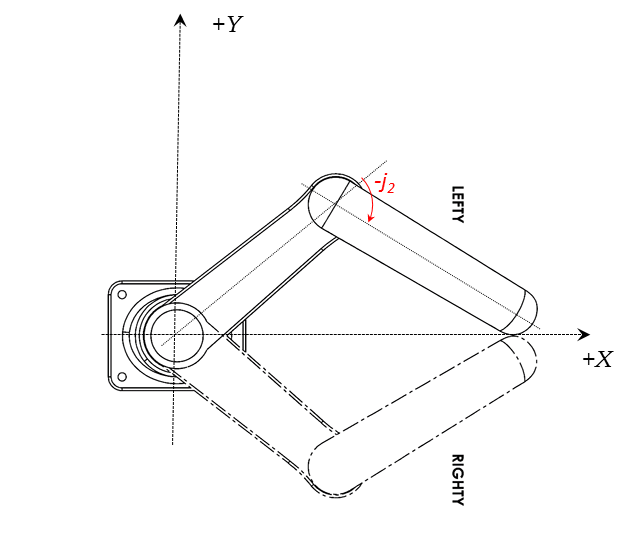

In [ ]:
q1_min=-180
q1_max=180
#q2_min=
#q2_max=
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(q2_min is not None)
assert(q2_max is not None)


In [ ]:
dataset = data_gen(q1_min, q1_max, q2_min, q2_max)
X = dataset[:18000,:2]
Y = dataset[:18000,2:]
X_test = dataset[18000:,:2]
Y_test = dataset[18000:,2:]
model.fit(X, Y, epochs=20)
model.evaluate(X_test,  Y_test, verbose=2)

**Let's make again a test of drawing the square**

In [ ]:
L=0.8
corner=[-0.4, -0.4]

sp = ScaraPlot(model, L, corner)

# plot final path
sp.plot_frame(sp.num_frames-1)
plt.title('full path')

# interactive
ipywidgets.interact(sp.plot_frame, f=(0,sp.num_frames-1))

In [ ]:
plot_q(model, L, corner)

**Did the performance improve?**

In [ ]:
answer=''
#answer='YES'
#answer='NO'
#answer='I CANNOT JUDGE'
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(answer!= '')

 **What happened at the end of the 3rd side drawing? Give your answer down below. Use the output of plot_q for explaining what is happening. Is this just a numerical issue or it also has physical motivation?**

In [ ]:
answer=''
#answer='the network is close to a numerical instability'
#answer='physical motivation, the robot is approaching its joint angle limitations'
#answer='both'
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(answer!='')

**Let's draw a smaller square.**

In [ ]:
L=0.3
corner=[0.4, -0.4]
sp = ScaraPlot(model, L, corner)

# plot final path
sp.plot_frame(sp.num_frames-1)
plt.title('full path')

# interactive
ipywidgets.interact(sp.plot_frame, f=(0,sp.num_frames-1))

In [ ]:
plot_q(model, L, corner)

**Did the performance of the drawing improve? What is the difference with the previous drawing?**

In [ ]:
answer=''
#answer='Performance is the same'
#answer='Performance is better because no joint inversions are required to complete the task.'
#answer='Performance is better because the trajectory is smaller.'
#answer='Performance is worse '
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(answer!='')

**Let's plot the last square**

In [ ]:
L=0.6
corner=[0.5, -0.4]
sp = ScaraPlot(model, L, corner)

# plot final path
sp.plot_frame(sp.num_frames-1)
plt.title('full path')

# interactive
ipywidgets.interact(sp.plot_frame, f=(0,sp.num_frames-1))

In [ ]:
plot_q(model, L, corner)

**In the second segment the robot does strange trajectories also going in elbow-right configuration. Why is this happening? Give your comment below**

In [ ]:
answer1=''
answer2=''
#answer='The network is underfitting'
#answer='The network is overfitting.'
#answer='The network is evaluated in point outside the training area'
#answer='We need to record more data'
#answer= 'The queried points are not feasible from physical point of view'
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(answer1!='')
assert(answer2!='')

**Give your final comment on dataset inconsistency, fitting discontinuities with a continuous regressor, feasibility of the control when applying this to a real robot, and the extrapolation/interpolation problem. Give your comment about how the Neural Network structure could be improved for the purpose of Inverse Kinematics**

YOUR ANSWER HERE